<a href="https://www.kaggle.com/code/eavprog/abscur-reyting-dohod?scriptVersionId=114129749" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг абсолютной доходности для проекта "Абсолютные валютные курсы"

[**Оглавление проекта "Абсолютные валютные курсы"**](https://docs.google.com/spreadsheets/d/1UgC2NfKtKJPaXglsmVJET7Xnp2ZtOzJgKD9DN-VGFA8/edit#gid=77497797)

Данные для настоящего расчета берутся из тетрадки [**Источник данных для проекта "Абсолютные валютные курсы"**](https://www.kaggle.com/code/eavprog/abscur-data).

Настоящий расчет показывает относительное изменение (в процентах) абсолютных валютных курсов за разные периоды (неделя, месяц, квартал и т.д.).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

data_abs = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col=0,parse_dates=True)
# data_abs.last("15d")

def rep(per,title_per):
    res = data_abs.asfreq(freq="D",method="pad").pct_change(per).last("D").transpose()*100
    res.columns = ['%']
    res.sort_values('%',ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг доходности за "+title_per+" c "+datetime.datetime.strftime(data_abs.asfreq(freq="D").index[-per],"%Y-%m-%d")+" по "+datetime.datetime.strftime(data_abs.index[-1],"%Y-%m-%d"),ylabel="%",legend=False,figsize=(15,5))
    plt.show()
    return pd.concat([res.iloc[:3,:],pd.DataFrame([{'%':'...'}],index=['...']),res.iloc[-3:,:]])

# Неделя
Относительное изменение (в процентах) абсолютных валютных курсов за неделю.

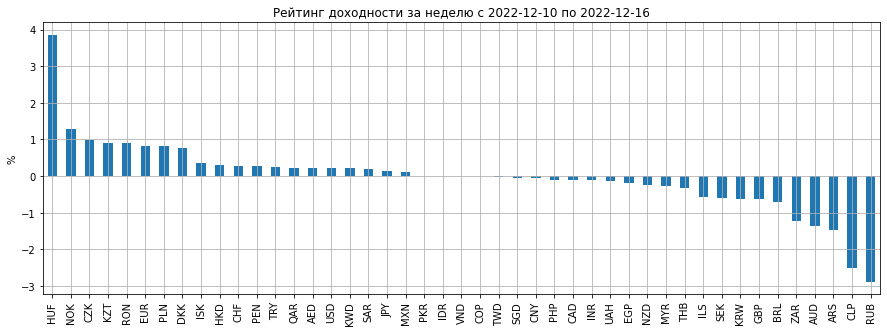

,%
HUF,3.861004
NOK,1.291513
CZK,0.985111
...,...
ARS,-1.485149
CLP,-2.51046
RUB,-2.885784


In [2]:
rep(7,"неделю")

# Месяц
Относительное изменение (в процентах) абсолютных валютных курсов за месяц.

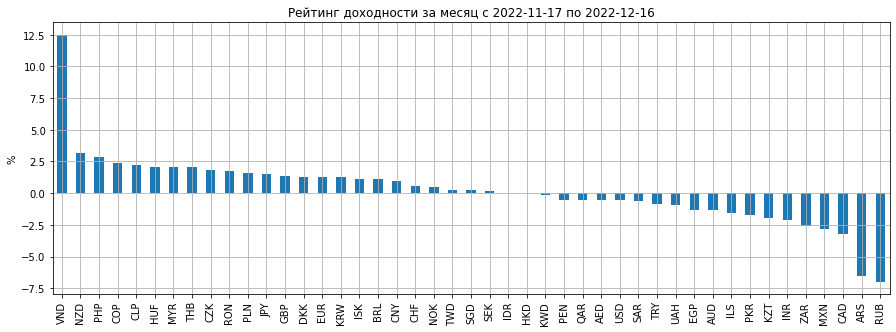

,%
VND,12.5
NZD,3.151056
PHP,2.82392
...,...
CAD,-3.248555
ARS,-6.499608
RUB,-6.982834


In [3]:
rep(30,"месяц")

# Квартал
Относительное изменение (в процентах) абсолютных валютных курсов за квартал.

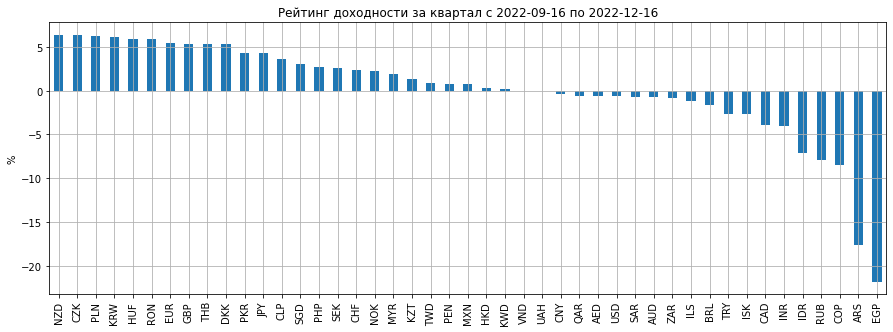

,%
NZD,6.380623
CZK,6.367174
PLN,6.195234
...,...
COP,-8.510638
ARS,-17.598344
EGP,-21.776531


In [4]:
rep(92,"квартал")

# Полгода
Относительное изменение (в процентах) абсолютных валютных курсов за полгода.

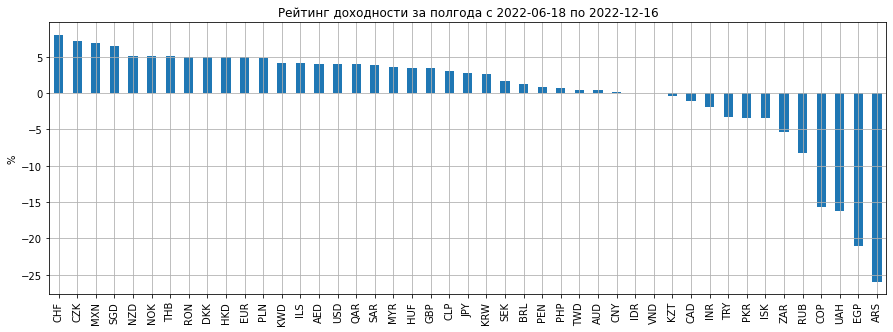

,%
CHF,8.059081
CZK,7.125045
MXN,6.94644
...,...
UAH,-16.246833
EGP,-21.105243
ARS,-25.976441


In [5]:
rep(182,"полгода")

# Один год
Относительное изменение (в процентах) абсолютных валютных курсов за год.

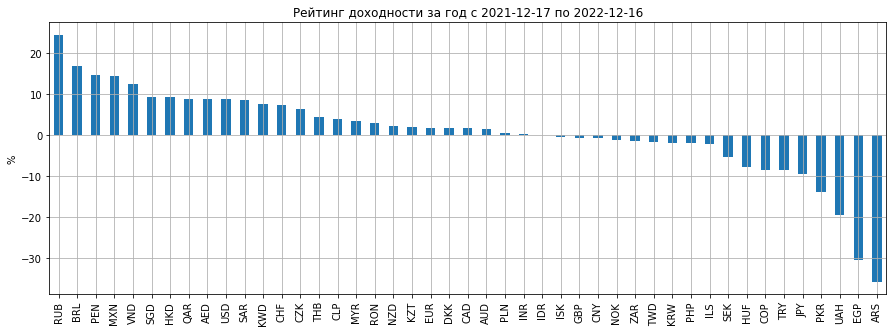

,%
RUB,24.590803
BRL,16.973538
PEN,14.655888
...,...
UAH,-19.417754
EGP,-30.555325
ARS,-35.806452


In [6]:
rep(365,"год")

# 3 года
Относительное изменение (в процентах) абсолютных валютных курсов за три года.

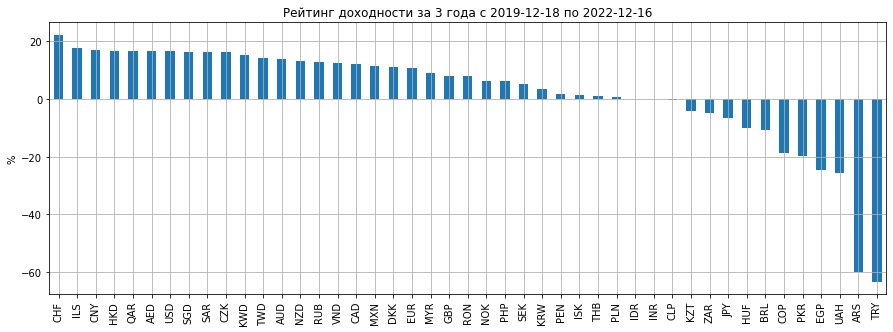

,%
CHF,22.236115
ILS,17.472785
CNY,16.788465
...,...
UAH,-25.674603
ARS,-59.79798
TRY,-63.249709


In [7]:
rep(365*3,"3 года")

# 5 лет
Относительное изменение (в процентах) абсолютных валютных курсов за пять лет.

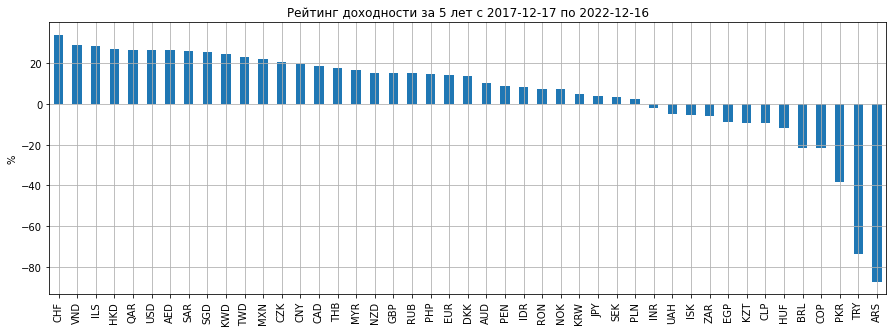

,%
CHF,33.906472
VND,28.571429
ILS,28.338853
...,...
PKR,-38.389262
TRY,-73.87998
ARS,-87.221747


In [8]:
rep(365*5+1,"5 лет")